In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import variance
import tensorflow as tf
from tensorflow import keras

#url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
#zip_path = keras.utils.get_file(origin=url, fname="jena_climate_2009_2016.csv.zip")
#zip_file = ZipFile(zip_path)
#zip_file.extractall()
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path=os.path.join(dirname, filename)
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jena-climate/jena_climate_2009_2016.csv


In [5]:
df = pd.read_csv(path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


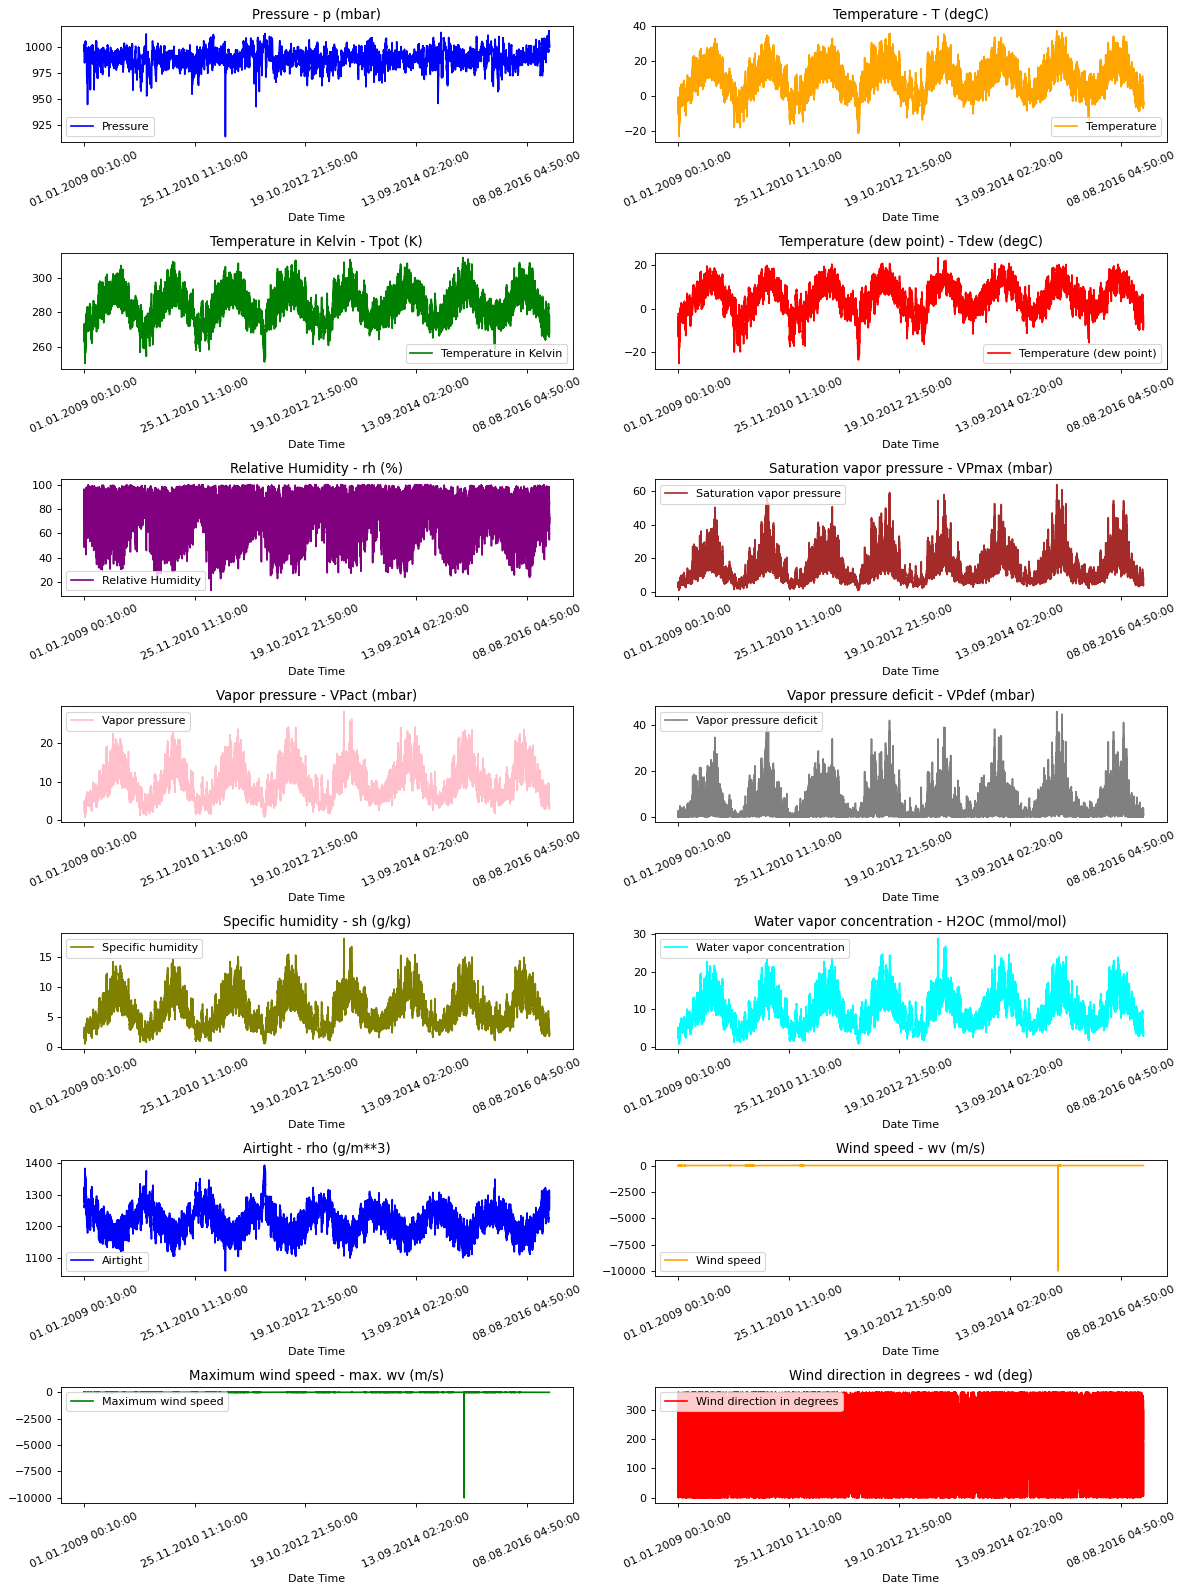

In [7]:
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "Date Time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)

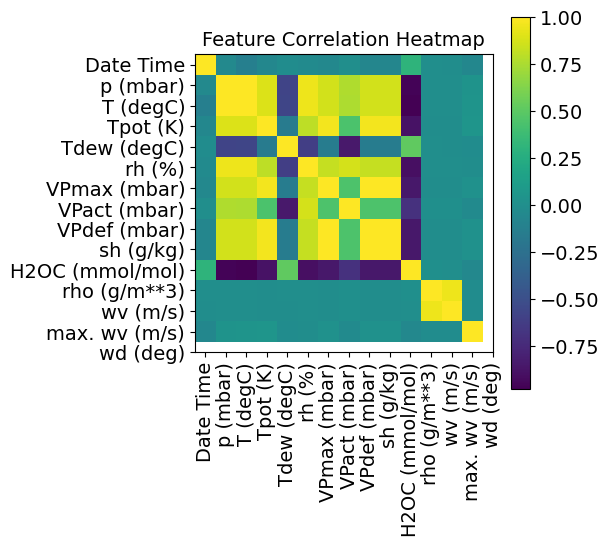

In [8]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(df)

In [9]:
split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))

#Observation is recorded every 10 mins, that means 6 times per hour
step = 6

# tracking data from past 720 timestamps
past = 720
# predicting data after 720 timestamps
future = 72
learning_rate = 0.01
batch_size = 13140
epochs = 10


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std


def test(data, train_split):
    data_mean = data[train_split+1:].mean(axis=0)
    data_std = data[train_split+1:].std(axis=0)
    return (data - data_mean) / data_std

In [10]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)
selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]
features = df[selected_features]
features.index = df[date_time_key]
features.head()

test_data = test(features.values, train_split)
features = normalize(features.values, train_split)

features = pd.DataFrame(features)
test_data = pd.DataFrame(test_data)
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

The selected parameters are: Pressure, Temperature, Saturation vapor pressure, Vapor pressure deficit, Specific humidity, Airtight, Wind speed


In [11]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(7)]].values
y_train = features.iloc[start:end][[1]]

sequence_length = int(past / step)

In [12]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [13]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(7)]].values
y_val = features.iloc[label_start:][[1]]

x_test = test_data.iloc[:][[i for i in range(7)]].values
y_test = test_data.iloc[:][[1]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)
dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch
print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (13140, 120, 7)
Target shape: (13140, 1)


In [14]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    kernel_regularizer='l1',
    recurrent_regularizer='l1',
    bias_regularizer='l1',
    activity_regularizer='l1',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 lstm (LSTM)                 (None, 32)                5120      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [15]:

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 2.6888
Epoch 1: val_loss improved from inf to 1.41984, saving model to model_checkpoint.h5
23/23 [==============================] - 85s 4s/step - loss: 2.6888 - val_loss: 1.4198
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 1.0724
Epoch 2: val_loss improved from 1.41984 to 0.79991, saving model to model_checkpoint.h5
23/23 [==============================] - 76s 3s/step - loss: 1.0724 - val_loss: 0.7999
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.7070
Epoch 3: val_loss improved from 0.79991 to 0.60650, saving model to model_checkpoint.h5
23/23 [==============================] - 77s 3s/step - loss: 0.7070 - val_loss: 0.6065
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.5787
Epoch 4: val_loss improved from 0.60650 to 0.51748, saving model to model_checkpoint.h5
23/23 [==============================] - 76s 3s/step - loss: 0.5787 - val_loss: 0.5175
Epoc

In [16]:
test_loss=model.evaluate(dataset_test)
print(test_loss)

32/32 [==============================] - 56s 2s/step - loss: 0.6167
0.6167057752609253


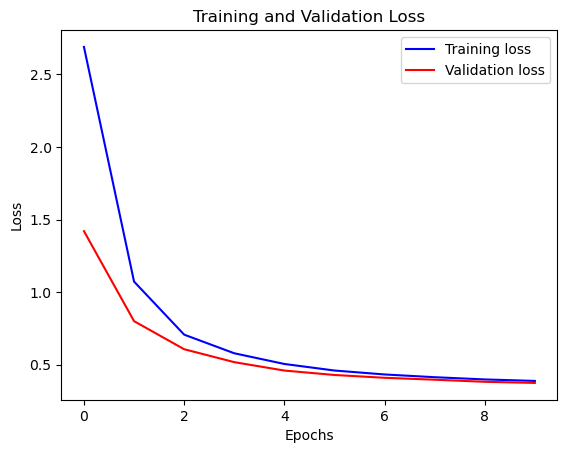

In [17]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

411/411 [==============================] - 6s 14ms/step


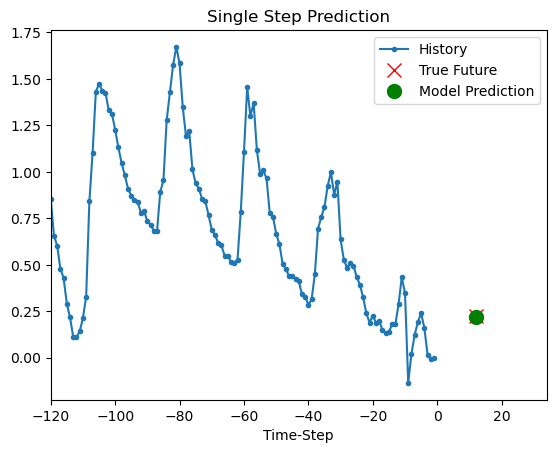

411/411 [==============================] - 6s 15ms/step


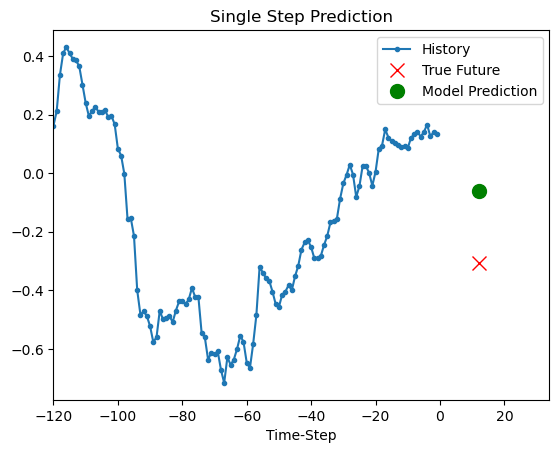

411/411 [==============================] - 6s 15ms/step


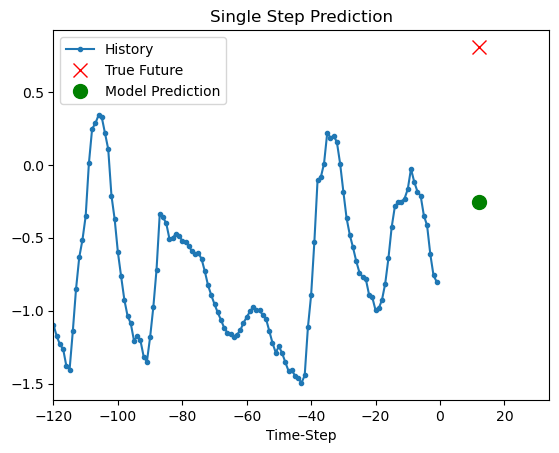

411/411 [==============================] - 6s 15ms/step


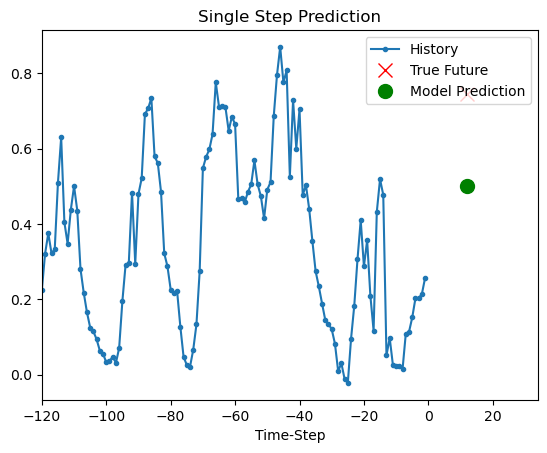

411/411 [==============================] - 6s 14ms/step


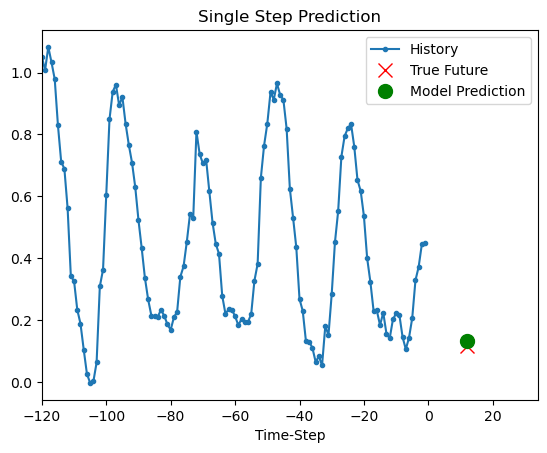

In [18]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )

In [19]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="orthogonal",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    kernel_regularizer='l1',
    recurrent_regularizer='l1',
    bias_regularizer='l1',
    activity_regularizer='l1',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                5120      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [20]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 2.2713
Epoch 1: val_loss improved from inf to 1.16935, saving model to model_checkpoint.h5
23/23 [==============================] - 79s 3s/step - loss: 2.2713 - val_loss: 1.1694
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.9130
Epoch 2: val_loss improved from 1.16935 to 0.69985, saving model to model_checkpoint.h5
23/23 [==============================] - 77s 3s/step - loss: 0.9130 - val_loss: 0.6999
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.6492
Epoch 3: val_loss improved from 0.69985 to 0.57326, saving model to model_checkpoint.h5
23/23 [==============================] - 81s 4s/step - loss: 0.6492 - val_loss: 0.5733
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.5564
Epoch 4: val_loss improved from 0.57326 to 0.50421, saving model to model_checkpoint.h5
23/23 [==============================] - 76s 3s/step - loss: 0.5564 - val_loss: 0.5042
Epoc

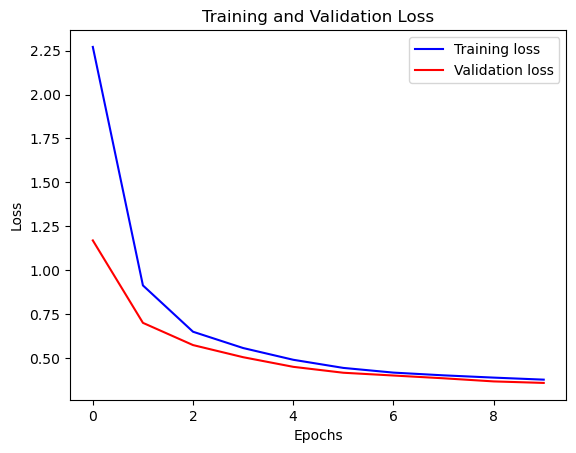

In [21]:
visualize_loss(history, "Training and Validation Loss")

In [22]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer='l1',
    recurrent_regularizer='l1',
    bias_regularizer='l1',
    activity_regularizer='l1',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                5120      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [23]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 3.0349
Epoch 1: val_loss improved from inf to 1.46858, saving model to model_checkpoint.h5
23/23 [==============================] - 81s 3s/step - loss: 3.0349 - val_loss: 1.4686
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 1.0825
Epoch 2: val_loss improved from 1.46858 to 0.78401, saving model to model_checkpoint.h5
23/23 [==============================] - 77s 3s/step - loss: 1.0825 - val_loss: 0.7840
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.7032
Epoch 3: val_loss improved from 0.78401 to 0.60478, saving model to model_checkpoint.h5
23/23 [==============================] - 77s 3s/step - loss: 0.7032 - val_loss: 0.6048
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.5846
Epoch 4: val_loss improved from 0.60478 to 0.52205, saving model to model_checkpoint.h5
23/23 [==============================] - 83s 4s/step - loss: 0.5846 - val_loss: 0.5220
Epoc

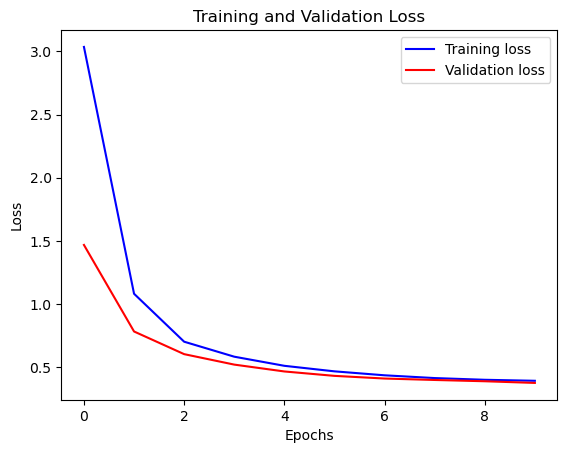

In [24]:
visualize_loss(history, "Training and Validation Loss")

In [25]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="orthogonal",
    recurrent_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer='l1',
    recurrent_regularizer='l1',
    bias_regularizer='l1',
    activity_regularizer='l1',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                5120      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [26]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 2.6655
Epoch 1: val_loss improved from inf to 1.28386, saving model to model_checkpoint.h5
23/23 [==============================] - 80s 3s/step - loss: 2.6655 - val_loss: 1.2839
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.9541
Epoch 2: val_loss improved from 1.28386 to 0.71514, saving model to model_checkpoint.h5
23/23 [==============================] - 78s 3s/step - loss: 0.9541 - val_loss: 0.7151
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.6529
Epoch 3: val_loss improved from 0.71514 to 0.57231, saving model to model_checkpoint.h5
23/23 [==============================] - 81s 4s/step - loss: 0.6529 - val_loss: 0.5723
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.5463
Epoch 4: val_loss improved from 0.57231 to 0.50508, saving model to model_checkpoint.h5
23/23 [==============================] - 82s 4s/step - loss: 0.5463 - val_loss: 0.5051
Epoc

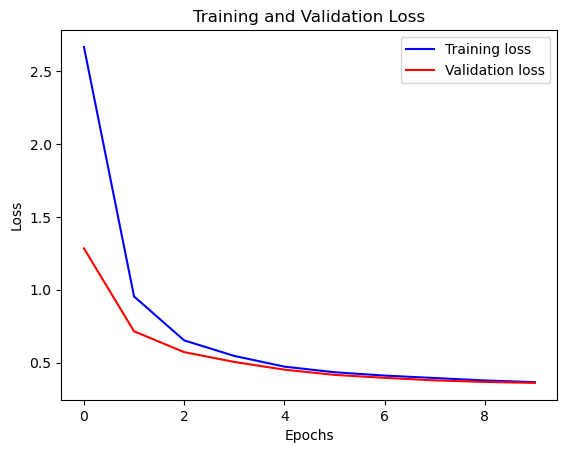

In [27]:
visualize_loss(history, "Training and Validation Loss")

In [28]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    kernel_regularizer='l2',
    recurrent_regularizer='l2',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 lstm_4 (LSTM)               (None, 32)                5120      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [29]:

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 0.8862
Epoch 1: val_loss improved from inf to 0.59492, saving model to model_checkpoint.h5
23/23 [==============================] - 81s 3s/step - loss: 0.8862 - val_loss: 0.5949
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.4896
Epoch 2: val_loss improved from 0.59492 to 0.39347, saving model to model_checkpoint.h5
23/23 [==============================] - 78s 3s/step - loss: 0.4896 - val_loss: 0.3935
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.3629
Epoch 3: val_loss improved from 0.39347 to 0.31983, saving model to model_checkpoint.h5
23/23 [==============================] - 82s 4s/step - loss: 0.3629 - val_loss: 0.3198
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.3034
Epoch 4: val_loss improved from 0.31983 to 0.31327, saving model to model_checkpoint.h5
23/23 [==============================] - 77s 3s/step - loss: 0.3034 - val_loss: 0.3133
Epoc

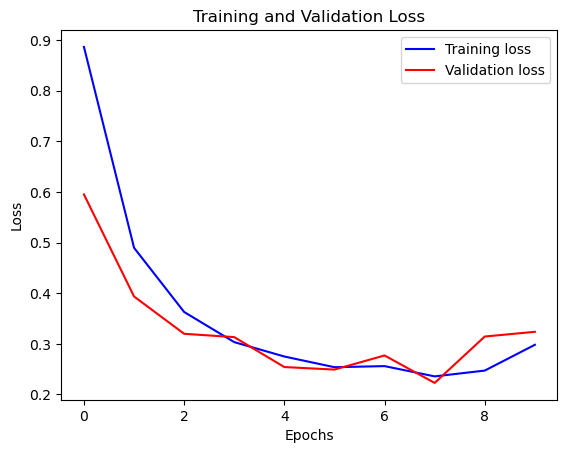

In [30]:
visualize_loss(history, "Training and Validation Loss")

In [31]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="orthogonal",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    kernel_regularizer='l2',
    recurrent_regularizer='l2',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                5120      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [32]:

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 0.8794
Epoch 1: val_loss improved from inf to 0.59593, saving model to model_checkpoint.h5
23/23 [==============================] - 81s 3s/step - loss: 0.8794 - val_loss: 0.5959
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.4923
Epoch 2: val_loss improved from 0.59593 to 0.40331, saving model to model_checkpoint.h5
23/23 [==============================] - 82s 4s/step - loss: 0.4923 - val_loss: 0.4033
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.3686
Epoch 3: val_loss improved from 0.40331 to 0.33927, saving model to model_checkpoint.h5
23/23 [==============================] - 78s 3s/step - loss: 0.3686 - val_loss: 0.3393
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.3131
Epoch 4: val_loss improved from 0.33927 to 0.27609, saving model to model_checkpoint.h5
23/23 [==============================] - 82s 4s/step - loss: 0.3131 - val_loss: 0.2761
Epoc

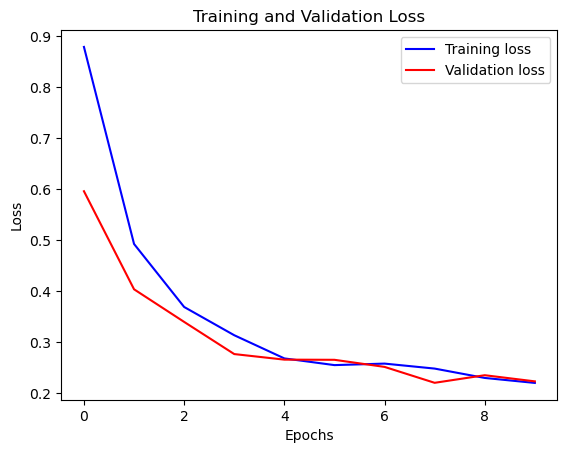

In [33]:
visualize_loss(history, "Training and Validation Loss")

In [34]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="orthogonal",
    recurrent_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer='l2',
    recurrent_regularizer='l2',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 lstm_6 (LSTM)               (None, 32)                5120      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [35]:

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 0.8962
Epoch 1: val_loss improved from inf to 0.57416, saving model to model_checkpoint.h5
23/23 [==============================] - 84s 4s/step - loss: 0.8962 - val_loss: 0.5742
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.4678
Epoch 2: val_loss improved from 0.57416 to 0.36858, saving model to model_checkpoint.h5
23/23 [==============================] - 84s 4s/step - loss: 0.4678 - val_loss: 0.3686
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.3422
Epoch 3: val_loss improved from 0.36858 to 0.30804, saving model to model_checkpoint.h5
23/23 [==============================] - 79s 3s/step - loss: 0.3422 - val_loss: 0.3080
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.2873
Epoch 4: val_loss improved from 0.30804 to 0.27846, saving model to model_checkpoint.h5
23/23 [==============================] - 78s 3s/step - loss: 0.2873 - val_loss: 0.2785
Epoc

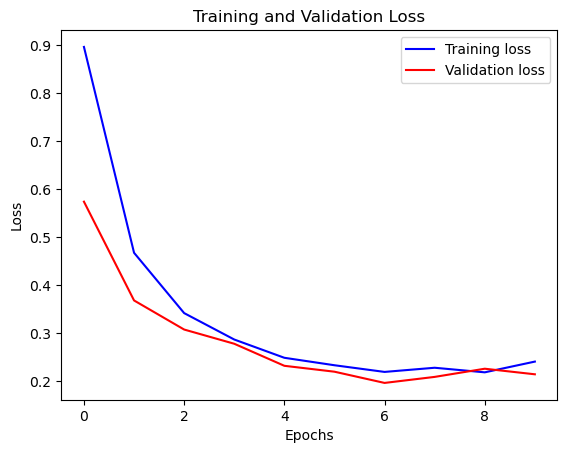

In [36]:
visualize_loss(history, "Training and Validation Loss")

In [37]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer='l2',
    recurrent_regularizer='l2',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 lstm_7 (LSTM)               (None, 32)                5120      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [38]:

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 1.0537
Epoch 1: val_loss improved from inf to 0.67874, saving model to model_checkpoint.h5
23/23 [==============================] - 85s 4s/step - loss: 1.0537 - val_loss: 0.6787
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.5474
Epoch 2: val_loss improved from 0.67874 to 0.43512, saving model to model_checkpoint.h5
23/23 [==============================] - 80s 3s/step - loss: 0.5474 - val_loss: 0.4351
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.3876
Epoch 3: val_loss improved from 0.43512 to 0.33534, saving model to model_checkpoint.h5
23/23 [==============================] - 83s 4s/step - loss: 0.3876 - val_loss: 0.3353
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.3120
Epoch 4: val_loss improved from 0.33534 to 0.29784, saving model to model_checkpoint.h5
23/23 [==============================] - 80s 3s/step - loss: 0.3120 - val_loss: 0.2978
Epoc

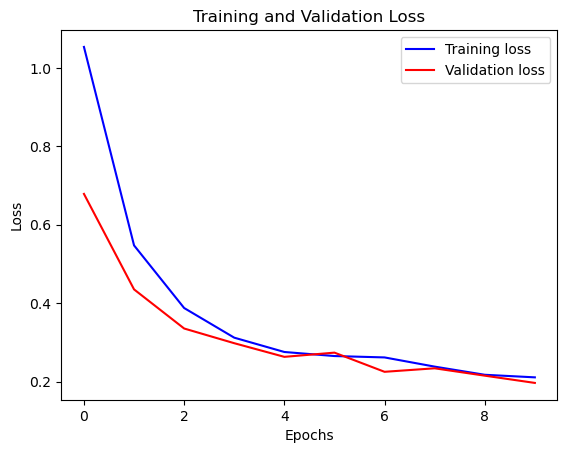

In [39]:
visualize_loss(history, "Training and Validation Loss")

In [40]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    kernel_regularizer='l1',
    recurrent_regularizer='l2',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
model.summary()
test_loss=model.evaluate(dataset_test)
print(test_loss)

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 1.2809
Epoch 1: val_loss did not improve from 0.19651
23/23 [==============================] - 87s 4s/step - loss: 1.2809 - val_loss: 0.7689
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.6168
Epoch 2: val_loss did not improve from 0.19651
23/23 [==============================] - 84s 4s/step - loss: 0.6168 - val_loss: 0.4641
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.4296
Epoch 3: val_loss did not improve from 0.19651
23/23 [==============================] - 83s 4s/step - loss: 0.4296 - val_loss: 0.4143
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.4006
Epoch 4: val_loss did not improve from 0.19651
23/23 [==============================] - 79s 3s/step - loss: 0.4006 - val_loss: 0.3226
Epoch 5/10
23/23 [==============================] - ETA: 0s - loss: 0.3339
Epoch 5: val_loss did not improve from 0.19651
23/23 [==============================] - 8

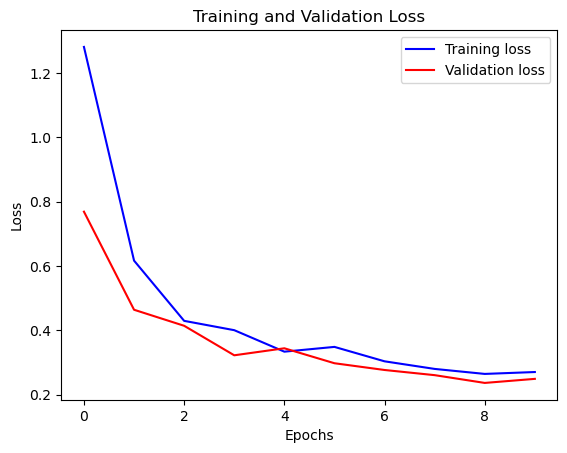

In [41]:
visualize_loss(history, "Training and Validation Loss")

In [42]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer='l1',
    recurrent_regularizer='l2',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)
model.summary()

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 1.6590
Epoch 1: val_loss did not improve from 0.19651
23/23 [==============================] - 81s 3s/step - loss: 1.6590 - val_loss: 1.0182
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.8095
Epoch 2: val_loss did not improve from 0.19651
23/23 [==============================] - 83s 4s/step - loss: 0.8095 - val_loss: 0.6117
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.5250
Epoch 3: val_loss did not improve from 0.19651
23/23 [==============================] - 83s 4s/step - loss: 0.5250 - val_loss: 0.4436
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.4057
Epoch 4: val_loss did not improve from 0.19651
23/23 [==============================] - 83s 4s/step - loss: 0.4057 - val_loss: 0.3627
Epoch 5/10
23/23 [==============================] - ETA: 0s - loss: 0.3614
Epoch 5: val_loss did not improve from 0.19651
23/23 [==============================] - 8

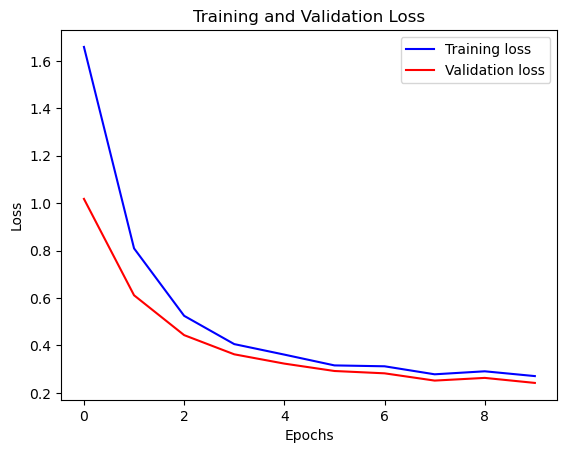

In [43]:
visualize_loss(history, "Training and Validation Loss")

In [44]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="orthogonal",
    recurrent_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer='l1',
    recurrent_regularizer='l2',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)
model.summary()

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 1.2760
Epoch 1: val_loss did not improve from 0.19651
23/23 [==============================] - 84s 4s/step - loss: 1.2760 - val_loss: 0.7905
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.6524
Epoch 2: val_loss did not improve from 0.19651
23/23 [==============================] - 80s 3s/step - loss: 0.6524 - val_loss: 0.4915
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.4532
Epoch 3: val_loss did not improve from 0.19651
23/23 [==============================] - 83s 4s/step - loss: 0.4532 - val_loss: 0.4141
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.4023
Epoch 4: val_loss did not improve from 0.19651
23/23 [==============================] - 78s 3s/step - loss: 0.4023 - val_loss: 0.3372
Epoch 5/10
23/23 [==============================] - ETA: 0s - loss: 0.3236
Epoch 5: val_loss did not improve from 0.19651
23/23 [==============================] - 8

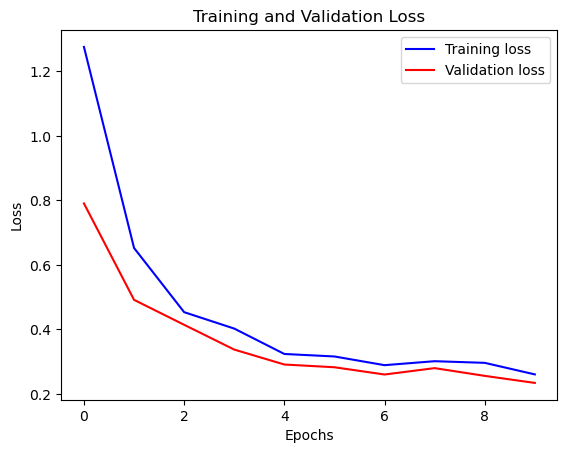

In [45]:
visualize_loss(history, "Training and Validation Loss")

In [46]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="orthogonal",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    kernel_regularizer='l1',
    recurrent_regularizer='l2',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)
model.summary()

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 1.2433
Epoch 1: val_loss did not improve from 0.19651
23/23 [==============================] - 84s 4s/step - loss: 1.2433 - val_loss: 0.7778
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.6473
Epoch 2: val_loss did not improve from 0.19651
23/23 [==============================] - 83s 4s/step - loss: 0.6473 - val_loss: 0.5100
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.4681
Epoch 3: val_loss did not improve from 0.19651
23/23 [==============================] - 82s 4s/step - loss: 0.4681 - val_loss: 0.4106
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.3876
Epoch 4: val_loss did not improve from 0.19651
23/23 [==============================] - 79s 3s/step - loss: 0.3876 - val_loss: 0.3520
Epoch 5/10
23/23 [==============================] - ETA: 0s - loss: 0.3486
Epoch 5: val_loss did not improve from 0.19651
23/23 [==============================] - 7

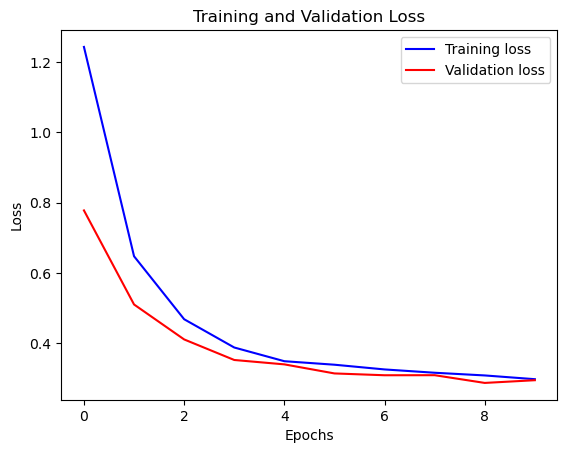

In [47]:
visualize_loss(history, "Training and Validation Loss")

In [48]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer='l2',
    recurrent_regularizer='l1',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)
model.summary()

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 2.3689
Epoch 1: val_loss did not improve from 0.19651
23/23 [==============================] - 80s 3s/step - loss: 2.3689 - val_loss: 1.0654
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.7574
Epoch 2: val_loss did not improve from 0.19651
23/23 [==============================] - 79s 3s/step - loss: 0.7574 - val_loss: 0.5410
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.4656
Epoch 3: val_loss did not improve from 0.19651
23/23 [==============================] - 75s 3s/step - loss: 0.4656 - val_loss: 0.4070
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.3835
Epoch 4: val_loss did not improve from 0.19651
23/23 [==============================] - 74s 3s/step - loss: 0.3835 - val_loss: 0.3588
Epoch 5/10
23/23 [==============================] - ETA: 0s - loss: 0.3485
Epoch 5: val_loss did not improve from 0.19651
23/23 [==============================] - 7

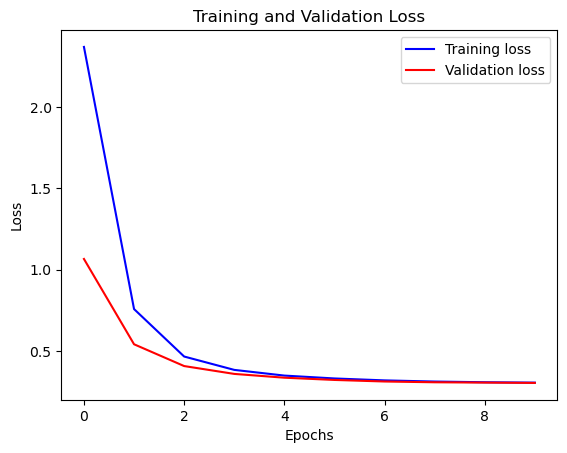

In [49]:
visualize_loss(history, "Training and Validation Loss")

In [50]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="orthogonal",
    recurrent_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer='l2',
    recurrent_regularizer='l1',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)
model.summary()

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 2.3997
Epoch 1: val_loss did not improve from 0.19651
23/23 [==============================] - 81s 3s/step - loss: 2.3997 - val_loss: 1.1107
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.7818
Epoch 2: val_loss did not improve from 0.19651
23/23 [==============================] - 77s 3s/step - loss: 0.7818 - val_loss: 0.5557
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.4842
Epoch 3: val_loss did not improve from 0.19651
23/23 [==============================] - 79s 3s/step - loss: 0.4842 - val_loss: 0.4207
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.3976
Epoch 4: val_loss did not improve from 0.19651
23/23 [==============================] - 79s 3s/step - loss: 0.3976 - val_loss: 0.3700
Epoch 5/10
23/23 [==============================] - ETA: 0s - loss: 0.3607
Epoch 5: val_loss did not improve from 0.19651
23/23 [==============================] - 7

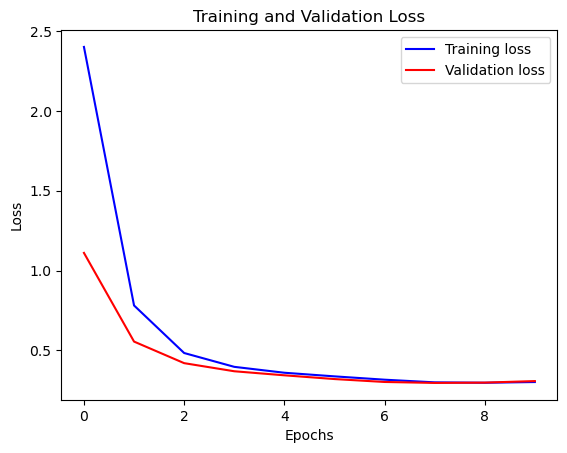

In [51]:
visualize_loss(history, "Training and Validation Loss")

In [52]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    kernel_regularizer='l2',
    recurrent_regularizer='l1',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)
model.summary()

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 2.0006
Epoch 1: val_loss did not improve from 0.19651
23/23 [==============================] - 85s 4s/step - loss: 2.0006 - val_loss: 1.0034
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.7449
Epoch 2: val_loss did not improve from 0.19651
23/23 [==============================] - 83s 4s/step - loss: 0.7449 - val_loss: 0.5574
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.4853
Epoch 3: val_loss did not improve from 0.19651
23/23 [==============================] - 79s 3s/step - loss: 0.4853 - val_loss: 0.4254
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.3986
Epoch 4: val_loss did not improve from 0.19651
23/23 [==============================] - 84s 4s/step - loss: 0.3986 - val_loss: 0.3747
Epoch 5/10
23/23 [==============================] - ETA: 0s - loss: 0.3610
Epoch 5: val_loss did not improve from 0.19651
23/23 [==============================] - 8

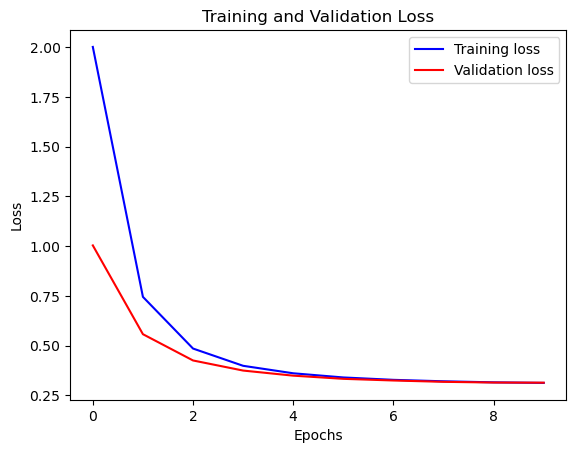

In [53]:
visualize_loss(history, "Training and Validation Loss")

In [54]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM( 32,
    activation="tanh",
    use_bias=True,
    kernel_initializer="orthogonal",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    kernel_regularizer='l2',
    recurrent_regularizer='l1',
    bias_regularizer='l2',
    activity_regularizer='l2',
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)
test_loss=model.evaluate(dataset_test)
print(test_loss)
model.summary()

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 1.9516
Epoch 1: val_loss did not improve from 0.19651
23/23 [==============================] - 83s 3s/step - loss: 1.9516 - val_loss: 0.9573
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.7193
Epoch 2: val_loss did not improve from 0.19651
23/23 [==============================] - 78s 3s/step - loss: 0.7193 - val_loss: 0.5432
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.4792
Epoch 3: val_loss did not improve from 0.19651
23/23 [==============================] - 80s 3s/step - loss: 0.4792 - val_loss: 0.4211
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.3965
Epoch 4: val_loss did not improve from 0.19651
23/23 [==============================] - 79s 3s/step - loss: 0.3965 - val_loss: 0.3688
Epoch 5/10
23/23 [==============================] - ETA: 0s - loss: 0.3591
Epoch 5: val_loss did not improve from 0.19651
23/23 [==============================] - 8

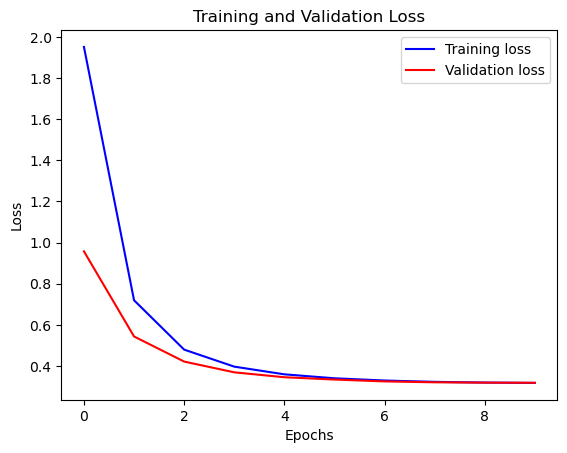

In [55]:
visualize_loss(history, "Training and Validation Loss")